## Import Pustaka

Pada file ini kami akan melakukan beberapa analisis dan model regresi sederhana. Data yang digunakan adalah rideshare_kaggle.csv yang merupakan dataset tarif uber dan lyft. Dataset yang kami gunakan memiliki jumlah data sebanyak 693071 record dan 57 kolom atau fitur. Sumber dataset yang kami gunakan didapatkan dari kaggle. Maksud dan tujuan utama dari project yang kami kerjakan adalah untuk memodelkan bagaimana harga atau tarif taksi bervariasi terhadap semua fitur yang telah diberikan dan mengukur performa dari model yang kami bangun.

Deskripsi fitur:
* cab_type adalah jenis layanan taxi, pada data terdapat dua layanan yakni lyft dan uber.

* name adalah jenis mobil yang digunakan driver.

* distance adalah jarak tempuh taxi dari asal sampai tujuan penumpang.

* price merupakan harga sewa taxi

* surge_multipier adalah lonjakan harga yang terjadi

## Import Pustaka

In [171]:
import pandas as pd #untuk manipulasi data
import numpy as np #untuk komputasi numerik
import matplotlib.pyplot as plt #untuk visualisasi
import seaborn as sns #untuk visualisasi
import folium as fm #untuk visualisasi
import plotly.express as px #untuk visualiasi

from dataclasses import dataclass
from folium.plugins import FastMarkerCluster #untuk visualisasi
from sklearn import preprocessing #untuk praproses data
from sklearn.model_selection import train_test_split #untuk pemisahan data latih dan uji
from sklearn.linear_model import LinearRegression #untuk menggunakan algoritma linear regression

# mengimpor Matplotlib, NumPy, dan beberapa fungsi dan kelas dari scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats

## Data Loading
Mengakses Data

In [172]:
df = pd.read_csv('rideshare_kaggle.csv') 
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [173]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [174]:
df.sample(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
113885,68d0a3dd-ae6c-40d2-8c3b-4f2ba5f8a013,1.544785e+09,10,14,12,2018-12-14 10:50:05,America/New_York,West End,Northeastern University,Uber,...,0.0000,1544806800,27.05,1544781600,46.67,1544814000,24.47,1544785200,43.88,1544817600
188459,602996d1-171e-4932-aed8-028795bb0e87,1.543744e+09,9,2,12,2018-12-02 09:48:00,America/New_York,Haymarket Square,West End,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
194126,c7508ccb-1748-40a5-87ac-ddcafaa84a03,1.544747e+09,0,14,12,2018-12-14 00:15:06,America/New_York,Boston University,North Station,Lyft,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [176]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [177]:
df.describe(include='object')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


In [178]:
df['price'].count()

637976

In [179]:
df['price'].sum()

10555392.979999999

In [180]:
df['price'].mean()

16.545125490614065

In [181]:
df.mean(numeric_only=True)

timestamp                      1.544046e+09
hour                           1.161914e+01
day                            1.779436e+01
month                          1.158668e+01
price                          1.654513e+01
distance                       2.189430e+00
surge_multiplier               1.013870e+00
latitude                       4.233817e+01
longitude                     -7.106615e+01
temperature                    3.958439e+01
apparentTemperature            3.588122e+01
precipIntensity                8.922153e-03
precipProbability              1.460758e-01
humidity                       7.411187e-01
windSpeed                      6.186253e+00
windGust                       8.469860e+00
windGustTime                   1.544049e+09
visibility                     8.467970e+00
temperatureHigh                4.504098e+01
temperatureHighTime            1.544050e+09
temperatureLow                 3.415074e+01
temperatureLowTime             1.544102e+09
apparentTemperatureHigh        4

In [182]:
df.shape

(693071, 57)

In [183]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [184]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [185]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [186]:
df.size

39505047

In [187]:
df['price'].size

693071

In [188]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

## Data Cleaning

In [189]:
df.isnull().sum().sum()

55095

In [190]:
df.dropna(axis=0,inplace=True)

In [191]:
df.isnull().sum().sum()

0

In [192]:
df.shape

(637976, 57)

## Eksplorasi Data

### Data Visualization
### Analisis Tren Waktu

mencetak jumlah observasi berdasarkan bulan dengan visualisasi

In [193]:
df['month'].value_counts()

12    374205
11    263771
Name: month, dtype: int64

In [194]:
df_month = df.groupby(by=["month"]).size().reset_index(name="counts")
px.bar(data_frame=df_month, x="month", y="counts", color="month", barmode="group")

Mencetak jumlah observasi berdasarkan hari dengan visualisasi

In [195]:
df['day'].value_counts()

27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: day, dtype: int64

In [196]:
df_day = df.groupby(by=["day"]).size().reset_index(name="counts")
px.bar(data_frame=df_day, x="day", y="counts", color="day", barmode="group")

In [197]:
df['hour'].value_counts()

0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: hour, dtype: int64

In [198]:
df_hour = df.groupby(by=["hour"]).size().reset_index(name="counts")
px.bar(data_frame=df_hour, x="hour", y="counts", color="hour", barmode="group")

Dalam 24 jam dalam seluruh hari yang direkam terdapat data.

### Analisis Tren Tipe Taksi
Mencetak jumlah observasi berdasarkan tipe taksi dengan visualisasi

In [199]:
df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

Jadi untuk seluruh data kami, kami memiliki data uber lebih dari data lyft. Perbedaannya tidak terlalu besar, setiap jenis taksi memiliki sekitar 300 ribu data.

Mencetak jumlah observasi berdasarkan bulan dan tipe taksi dengan visualisasi

In [200]:
df_cab = df.groupby(by=["cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df_cab, x="cab_type", y="counts", color="cab_type", barmode="group")

Mencetak jumlah observasi berdasarkan hari dan tipe taksi dengan visualisasi

In [201]:
df_cabMon = df.groupby(by=["month","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df_cabMon, x="month", y="counts", color="cab_type", barmode="group")

Mencetak jumlah observasi berdasarkan hari dan tipe taksi dengan visualisasi

In [202]:
df_cabDay = df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df_cabDay, x="day", y="counts", color="cab_type", barmode="group")

Mencetak jumlah observasi berdasarkan jam dan tipe taksi dengan visualisasi

In [203]:
df_cabHour = df.groupby(by=["hour","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df_cabHour, x="hour", y="counts", color="cab_type", barmode="group")

Jadi di setiap hari dan setiap jam yang tercatat, uber tampaknya mendominasi pemesanan di data.

Mencetak jumlah observasi berdasarkan tujuan pengguna dengan visualisasi

In [204]:
df['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [205]:
df['destination'].value_counts()

Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: destination, dtype: int64

In [206]:
df_dest = df.groupby(by=["destination","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df_dest, x="destination", y="counts", color="cab_type", barmode="group")

Mencetak jumlah observasi berdasarkan tujuan dengan visualisasi

In [207]:
df['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [208]:
df['source'].value_counts()

Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: source, dtype: int64

In [209]:
df_source = df.groupby(by=["source","cab_type"]).size().reset_index(name="counts")
px.bar(data_frame=df_source, x="source", y="counts", color="cab_type", barmode="group")

Dari visualisasi yang telah dilakukan dapat disimpulkan bahwa Uber menjadi langganan pelanggan.

In [210]:
df_hour = df.groupby(by=["name"]).size().reset_index(name="counts")
px.bar(data_frame=df_hour, x="name", y="counts", color="name", barmode="group")

Jenis kendaraan yang paling banyak digunakan berturut-turut adalah BlackSUVU=UberXL=WAV, Black, UberX, UberPool, Lux Black=Lux Black XL=Lyft= Lyft XL, Shared.

### Analisis Harga
Kita dapat melihat rata-rata atau rata-rata dari data harga kita di setiap rute (asal-tujuan) melalui tabel di bawah ini.

In [211]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

Kemudian dapat dilihat data harga maksimum.

In [212]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,...,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


berikut disjikan data harga minimum kami

In [213]:
print('Minimum price in our data :',df.price.min())
df[df['price']==df.price.min()]

Minimum price in our data : 2.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
5901,f6ed86e6-c3f1-42f5-9ce9-bb4bea19f18e,1.543448e+09,23,28,11,2018-11-28 23:33:41,America/New_York,Boston University,Back Bay,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
7370,5c77b1f4-dbd3-4533-8ba9-ddc4af2ad740,1.545134e+09,11,18,12,2018-12-18 11:45:10,America/New_York,Haymarket Square,Beacon Hill,Lyft,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
8623,9da5d7c6-cbf6-4dc9-a69f-3c57893ade01,1.543440e+09,21,28,11,2018-11-28 21:20:10,America/New_York,South Station,Financial District,Lyft,...,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200
16675,1ad71e9a-d990-49be-8b77-6e94fb40f260,1.543299e+09,6,27,11,2018-11-27 06:06:21,America/New_York,Fenway,Back Bay,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
17032,93192aa7-f773-4127-9a02-ab52d061d26a,1.543459e+09,2,29,11,2018-11-29 02:29:08,America/New_York,North End,North Station,Lyft,...,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677015,7ed35758-7e46-4602-a0fe-d46276142fab,1.545115e+09,6,18,12,2018-12-18 06:40:13,America/New_York,Haymarket Square,Financial District,Lyft,...,0.0028,1545152400,23.23,1545192000,38.10,1545109200,12.12,1545134400,32.10,1545109200
679085,085a21fd-6b7a-4ffe-bc57-b467e4ef7982,1.543823e+09,7,3,12,2018-12-03 07:38:01,America/New_York,Theatre District,South Station,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
679217,eebce30a-3d96-4833-a8be-6a4c1c14b264,1.543350e+09,20,27,11,2018-11-27 20:27:22,America/New_York,Back Bay,South Station,Lyft,...,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
679502,3f71f02f-e270-4140-ab47-d6ec4ff188f0,1.543290e+09,3,27,11,2018-11-27 03:36:22,America/New_York,Beacon Hill,South Station,Lyft,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400


## Data Preprocessing
Mencari fitur yang akan digunakan untuk pemodelan

### Menghapus Fitur yang Tidak Perlu

In [214]:
# Menghapus fitur yang tidak diperlukan

new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [215]:
new_df.shape

(637976, 42)

Tujuan kami adalah membuat model regresi linier. Pertama, kami memeriksa korelasi antara fitur kami dan fitur target (price). Pertama, kami ingin memeriksa korelasi fitur terkait temperatur dengan fitur target kami (price).

In [216]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [217]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<AxesSubplot:>

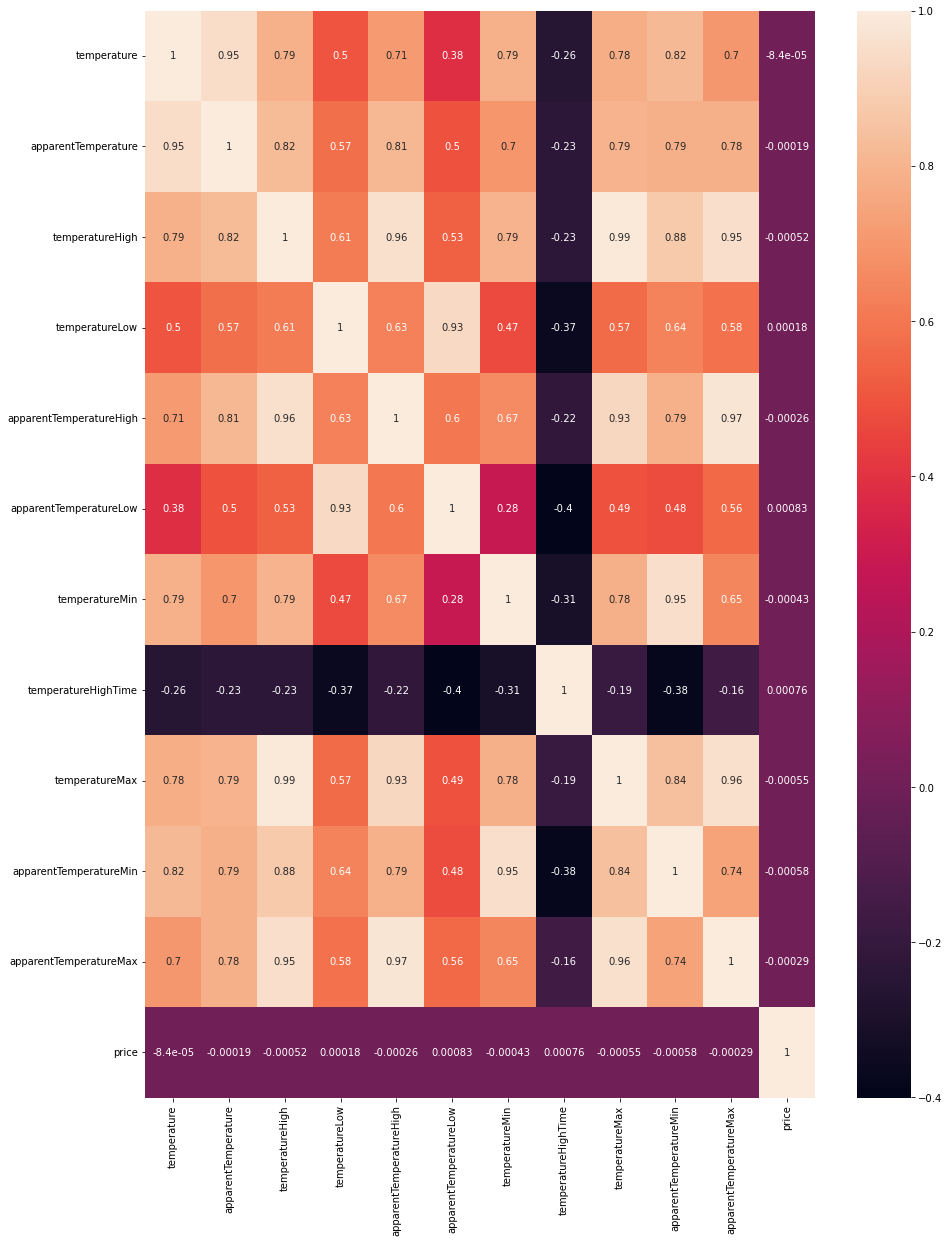

In [218]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

Kami melihat bahwa semua fitur terkait suhu memiliki korelasi yang lemah dengan fitur target kami yaitu harga. Menghapus semuanya tidak akan berdampak apa pun pada model regresi kami

In [219]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637976, 31)

Kedua, kami ingin memeriksa korelasi fitur terkait iklim kami dengan fitur target kami (price).

In [220]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

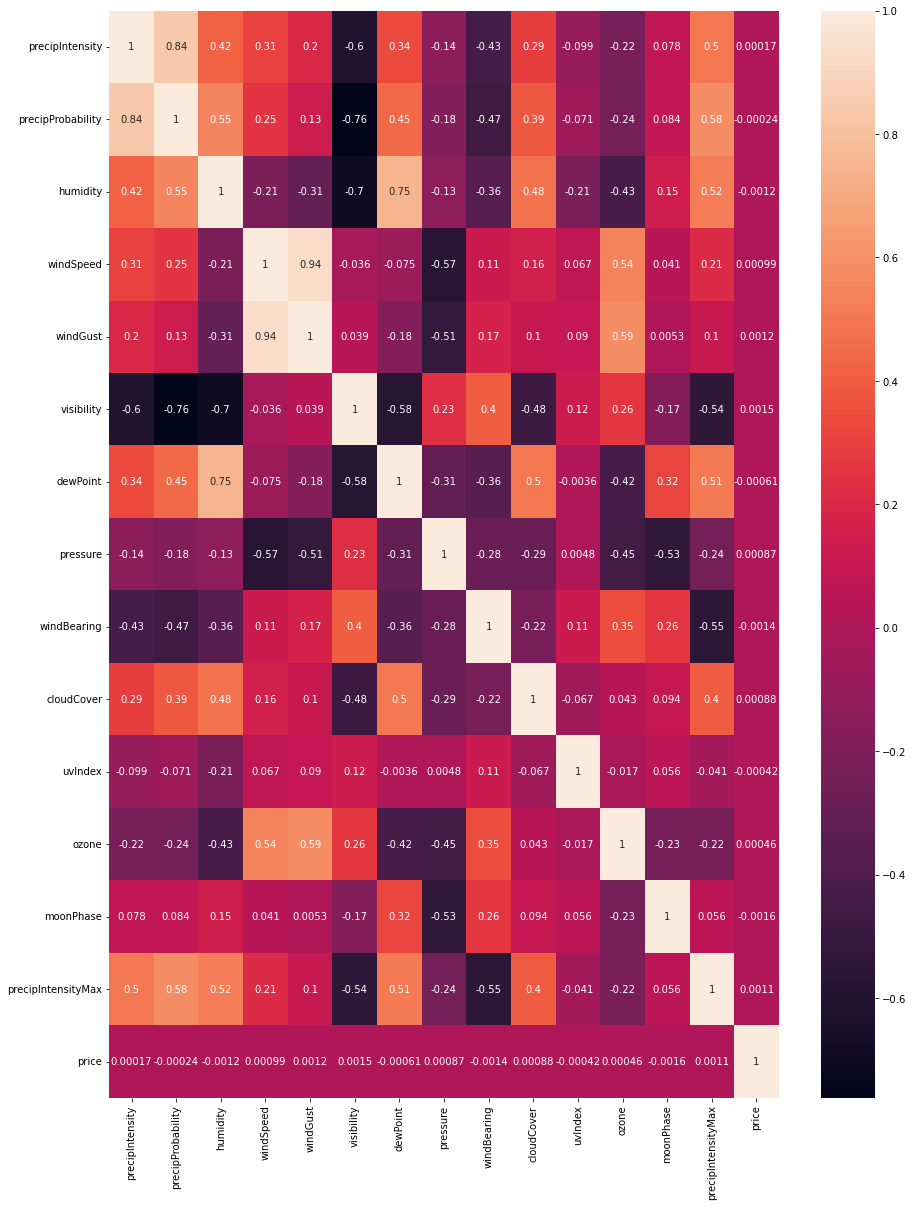

In [221]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Rupanya semua fitur terkait iklim juga memiliki korelasi yang lemah dengan fitur target kami yaitu harga. Sekali lagi, menghapus semuanya tidak akan berdampak apa pun pada model regresi kami.

In [222]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility.1', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637976, 17)

Ketiga, kami ingin memeriksa nilai kategoris kami di fitur dataset.

In [223]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

Kita dapat melihat bahwa fitur 'timezone' hanya memiliki 1 nilai dan fitur 'product_id' berisi banyak nilai yang tidak teridentifikasi. Jadi kita bisa menghapus atau menjatuhkannya.

In [224]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [225]:
new_df.shape

(637976, 15)

Keempat, kami ingin memeriksa korelasi fitur kategoris kami dengan fitur target kami (price)

In [226]:
new_cat = ['source','destination','cab_type','name','short_summary','icon','price']
df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [227]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [228]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<AxesSubplot:>

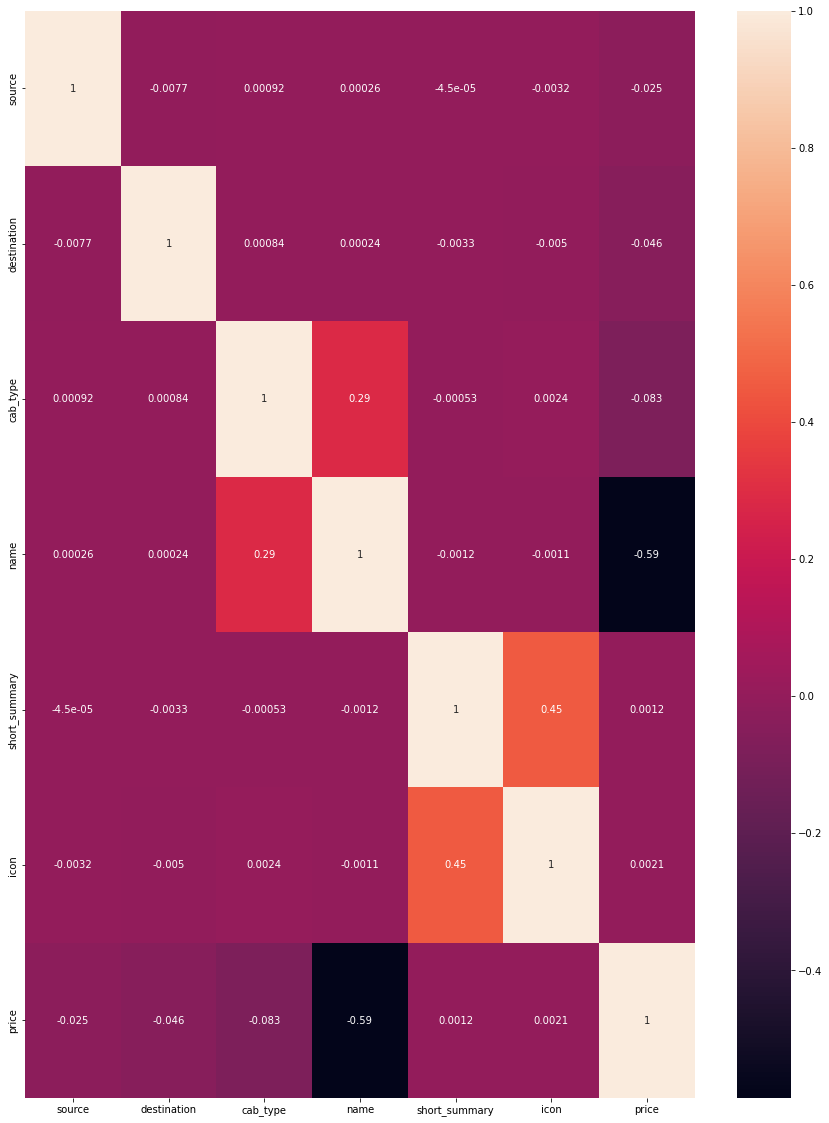

In [229]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

Kita hanya bisa melihat fitur 'name' yang memiliki korelasi relatif kuat. Fitur 'source','destination', dan 'cab_type' memiliki korelasi yang relatif lemah, tetapi saya akan memilih fitur 'cab_type' karena memiliki korelasi yang lebih kuat daripada dua fitur lainnya. Kami akan menghapus sisa kolomnya.

In [230]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude,visibility
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,10.000
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,4.786
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,10.000
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,10.000
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,10.000


In [231]:
new_df = new_df.drop(['hour','day','month','latitude','longitude'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier,visibility
0,Lyft,Shared,5.0,0.44,1.0,10.000
1,Lyft,Lux,11.0,0.44,1.0,4.786
2,Lyft,Lyft,7.0,0.44,1.0,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,10.000


In [232]:
new_df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier',
       'visibility'],
      dtype='object')

### Removing Outliers
Memeriksa outlier. Memeriksa nilai ambang batas Min dan Maks dan plot pada kolom Price..

In [233]:
max_threshold = new_df['price'].quantile(0.99)
max_threshold

42.5

In [234]:
new_df[new_df['price']>max_threshold]

,cab_type,name,price,distance,surge_multiplier,visibility
706,Lyft,Lux Black,52.5,3.25,2.00,9.899
707,Lyft,Lux Black XL,67.5,3.25,2.00,9.827
769,Lyft,Lux Black XL,45.5,4.76,1.00,9.962
1094,Lyft,Lux Black XL,45.5,4.31,1.00,2.030
1318,Lyft,Lux Black XL,45.5,5.33,1.00,9.608
...,...,...,...,...,...,...
692439,Uber,Black SUV,47.0,5.56,1.00,9.808
692698,Lyft,Lux Black XL,52.5,4.58,1.25,9.641
692891,Lyft,Lux Black XL,47.5,5.42,1.00,1.460
692962,Uber,Black SUV,51.0,7.36,1.00,9.889


In [235]:
min_threshold = new_df['price'].quantile(0.01)
min_threshold

3.5

c:\Users\Agung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

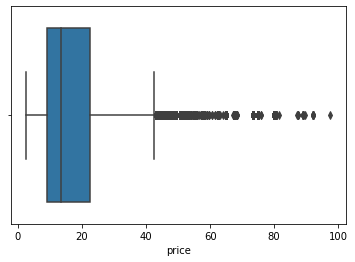

In [236]:
sns.boxplot(new_df['price'])

Kami telah melakukan ini sebelumnya tetapi hanya untuk satu instance yang memiliki nilai harga maksimum. Kami ingin memeriksa kemungkinan outlier lain

Kami menggunakan metode IQR untuk memeriksa outlier atas dan bawah.

In [237]:
Qp12 = new_df['price'].quantile(0.25)
Qp32 = new_df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [238]:
new_df[new_df['price']>(Qp32+(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier,visibility
706,Lyft,Lux Black,52.5,3.25,2.00,9.899
707,Lyft,Lux Black XL,67.5,3.25,2.00,9.827
769,Lyft,Lux Black XL,45.5,4.76,1.00,9.962
1094,Lyft,Lux Black XL,45.5,4.31,1.00,2.030
1318,Lyft,Lux Black XL,45.5,5.33,1.00,9.608
...,...,...,...,...,...,...
692439,Uber,Black SUV,47.0,5.56,1.00,9.808
692698,Lyft,Lux Black XL,52.5,4.58,1.25,9.641
692891,Lyft,Lux Black XL,47.5,5.42,1.00,1.460
692962,Uber,Black SUV,51.0,7.36,1.00,9.889


In [239]:
new_df[new_df['price']<(Qp12-(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier,visibility


Kita dapat melihat bahwa kita memiliki 5588 data outlier. Kami dapat menghapusnya.

In [240]:
print('Size before removing :',new_df.shape)
new_df= new_df[~((new_df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',new_df.shape)

Size before removing : (637976, 6)
Size after removing : (632387, 6)


<AxesSubplot:>

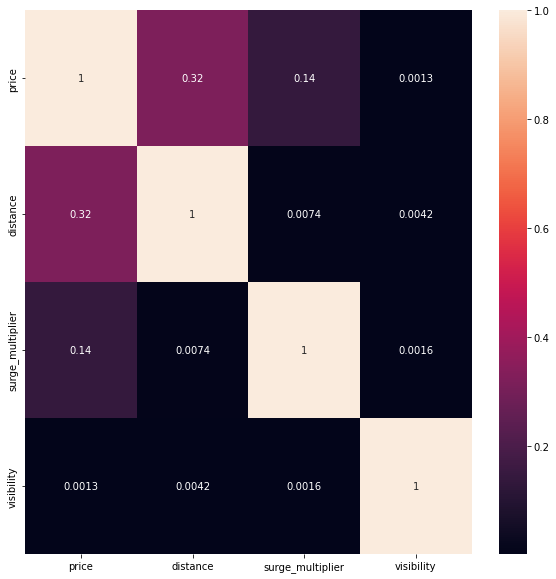

In [241]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),annot=True)

### Encoding Data (One Hot Encoding)

In [242]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [243]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

,price,distance,surge_multiplier,visibility,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,10.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0


## Pendefinisian Model

### Langkah 1: Impor Paket, Fungsi, dan Kelas

### Dataset Split

In [244]:
x = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

In [245]:
new_df_onehot.head()

,price,distance,surge_multiplier,visibility,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,10.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Pelatihan Model

In [247]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Evaluasi Model

In [248]:
y_pred=model.predict(x_test)

In [249]:
# mendapatkan akurasi dengan .score()
model.score(x_train, y_train)

0.9332388699152284

In [250]:
model.score(x_test, y_test)

0.9337777287046413

In [251]:
print("Nilai koefisien regresi:\n", model.coef_)
print("Nilai intersep:\n", model.intercept_)

Nilai koefisien regresi:
 [ 2.66635024e+00  1.36591271e+01 -1.46556521e-03  4.39422850e-01
 -4.39422850e-01  4.67730500e+00  1.42663411e+01  5.41827780e-01
  5.70300104e+00  1.43524045e+01 -7.59662877e+00 -1.91127250e+00
 -1.06499092e+01 -7.07572764e+00 -6.05841580e+00 -1.88378546e-01
 -6.06054696e+00]
Nilai intersep:
 -3.2261825575383973


Menghitung RMSE untuk regresi linier

In [252]:
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

5.108473856518005
2.260193322819534


In [253]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 6.331e+05
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:01:50   Log-Likelihood:            -1.4138e+06
No. Observations:              632387   AIC:                         2.828e+06
Df Residuals:                  632372   BIC:                         2.828e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0563      0.023    -88.025      0.0

## Model Inference
Untuk menampilkan prediksi harga setelah pengolahan model maka dibuat model inference. Adapun isi yang memuat dalam model inference adalah=
* distance = jarak tempuh;
pilihan distance berupa angka yang jenis datanya adalah desimal dan dalam satuan mill.
* surge = lonjakan harga;
adapun pilihan surge adalah angka berupa desimal.
* types = jenis layanan cab;
pilihan types atau layanan cab adalah:
1. Uber
2. Lyft
* ride = jenis mobil driver;
adapun pilihan jenis mobil cab adalah:
1. UberX
2. UberXL
3. Black
4. BlackSUV
5. WAV
6. UberPool
7. Taxi
8. Shared
9. Lyft
10. LyftXL
11. Lux
12. LuxBlack
13. LuxBlackXL
dari fitur-fitur yang telah ditentukan tersebut maka pengguna dapat mengetahui harga sewa cab dalam mata uang dollar.

In [254]:
distance = float(input("Distance:"))
surge = float(input("Surge Multiplier:"))
types = input("Uber/Lyft?")
ride = input("Ride Types:")

val = [distance, surge]

cab_types = {"Uber":0,
            "Lyft":1}

for i in range(0,2):
    if cab_types[types]==i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {"UberX" : 0,
                 "UberXL" : 1,
                 "Black" : 2,
                 "BlackSUV": 3,
                 "WAV" : 4,
                 "UberPool" : 5,
                 "Taxi" : 6,
                 "Shared" : 7,
                 "Lyft" : 8,
                 "LyftXL" : 9,
                 "Lux": 10,
                 "LuxBlack" : 11,
                 "LuxBlackXL" : 12}

for i in range(0,13):
    if ride_types[ride]==i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = model.predict([val])

print("Here's your estimated price in dollar:", predict)

[40.0, 1.4, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Here's your estimated price in dollar: [114.95251059]


## Pengambilan Kesimpulan
Dari Pengolahan data yang telah dilakukan maka dapat ditarik beberapa kesimpulan yaitu;
* Data yang dimiliki diirekam atau diambil pada bulan november dan desember dengan dominasi data pada bulan desember.
* Uber merupakan layanan yang paling laku digunakan oleh pelanggan disetiap hari maupun bulan.
* Jenis kendaraan yang digunakan driver merupakan fitur yang paling mempengaruhi harga sewa cab.
* Jam tersibuk berada pada jam 23.00-00.00 dan Jam terpadat paling lama berada pada jam 10.00-18.00.
* Harga transaksi paling tinggi yang pernah terjadi adalah 97.5 dollar dan transaksi paling rendah adalah 2.5 dollar.
* Jenis kendaraan yang paling banyak digunakan berturut-turut adalah:

1. BlackSUVU = UberXL = WAV,
2. Black,
3. UberX,
4. UberPool,
5. Lux Black = Lux Black XL= Lyft = Lyft XL,
6. Shared.

* Telah dibuat model prediksi harga sewa cab yang berdasarkan fitur jarak (distance), lonjakan harga (surge_multipier), jenis layanan (cab_type) dan jenis kendaraan (name).
* Telah didapatkan model terbaik dengan ketepatan prediksi atau r-squared sebesar 0,933.

In [255]:
import pickle
with open ('lyft_uber_price_regressor.pkl', 'wb') as f:
  pickle.dump(model, f)